In [306]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# library datetime
from datetime import datetime
from operator import attrgetter

pd.set_option('display.max_columns', None)

# menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

# **BUSINESS PROBLEM**

> #### **Question:**</br> Menganalisis bagaimana cara meningkatkan profit perusahaan dengan fokus pada perilaku pelanggan, pengeluaran, dan interaksi mereka dengan berbagai produk dan promosi.

# **DATA ANALYSIS**

## **Load Dataset**

In [307]:
df = pd.read_csv('Supermarket_Cleaning.csv')
df = df.reset_index().drop(columns=['index', 'Unnamed: 0'])
df

,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
0,55,Adult,Graduate,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,7.333333,0,0,0,0,0,0,1,1
1,60,Adult,Graduate,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,2.000000,0,0,0,0,0,0,0,0
2,48,Adult,Graduate,Married,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,20.000000,0,0,0,0,0,0,0,0
3,30,Middle Age,Graduate,Married,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,3.000000,0,0,0,0,0,0,0,0
4,33,Middle Age,Postgraduate,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,2.800000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,26,Middle Age,Graduate,Single,26816.0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,4,3,3.000000,0,0,0,0,0,0,0,0
2039,46,Adult,Graduate,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,16,8.000000,0,0,0,0,0,0,0,0
2040,33,Middle Age,Graduate,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,18,18.000000,0,1,0,0,0,0,0,1
2041,58,Adult,Postgraduate,Married,69245.0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,21,10.500000,0,0,0,0,0,0,0,0


In [308]:
def annotate_bars(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                        size=7, xytext=(0, 8),
                        textcoords='offset points')

## **Analisis Demografi Pelanggan**
- Tujuan : Memahami karakteristik customer

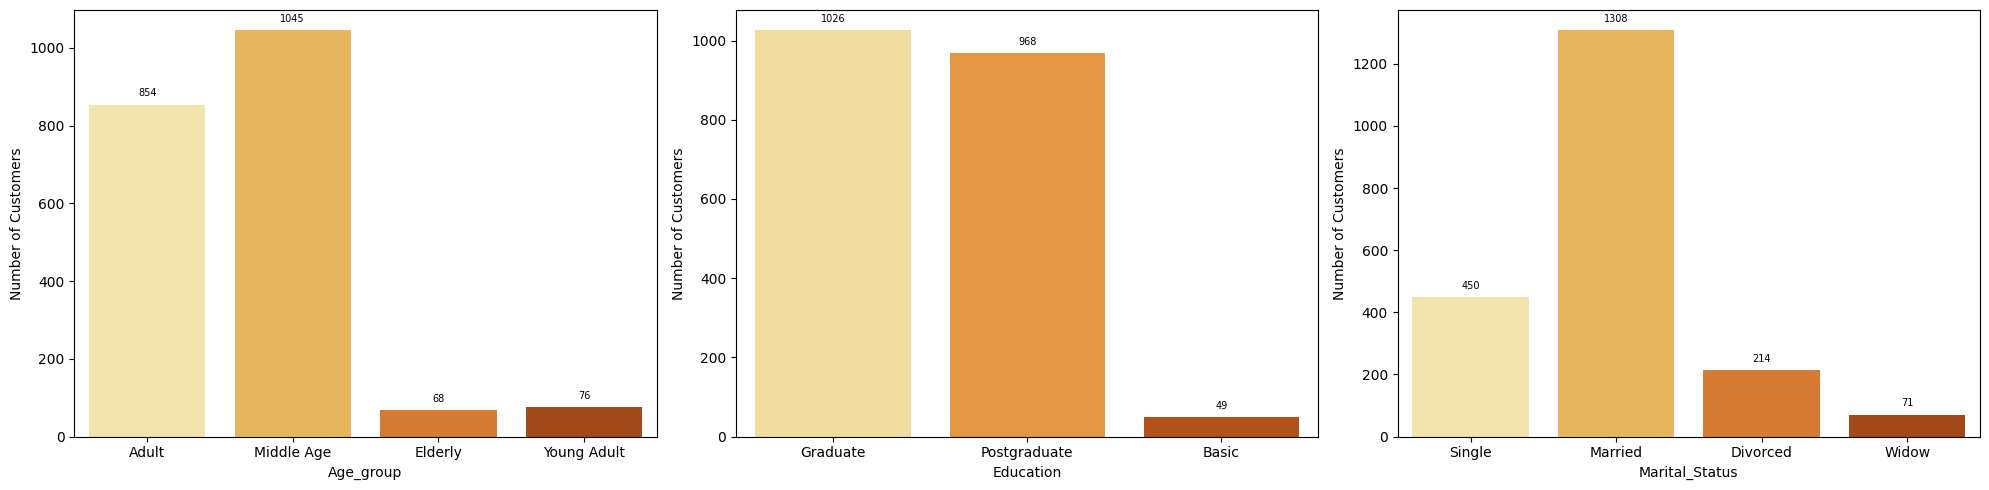

In [309]:
# Melihat distribusi berdasarkan usia, pendidikan dan status pernikahan
cat = ['Age_group', 'Education', 'Marital_Status']

# Menentukan jumlah kolom untuk subplot
n_cols = 3
n_rows = -(-len(cat) // n_cols)  # Menghitung jumlah baris yang dibutuhkan tanpa math.ceil()

# Membuat figure untuk subplot
fig = plt.figure(figsize=(20, 5))

# Looping melalui setiap kolom untuk menampilkan countplot
for i, column in enumerate(cat, 1):
    fig.add_subplot(n_rows, n_cols, i)
    bar = sns.countplot(x=df[column], palette="YlOrBr")
    
    # Menambahkan anotasi ke setiap bar menggunakan fungsi annotate_bars
    annotate_bars(bar)
    
    # Mengatur label dan limit
    plt.ylabel('Number of Customers', fontsize=10, loc='center')
    plt.tight_layout()

# Menampilkan visualisasi
plt.show()

<Axes: xlabel='Income'>

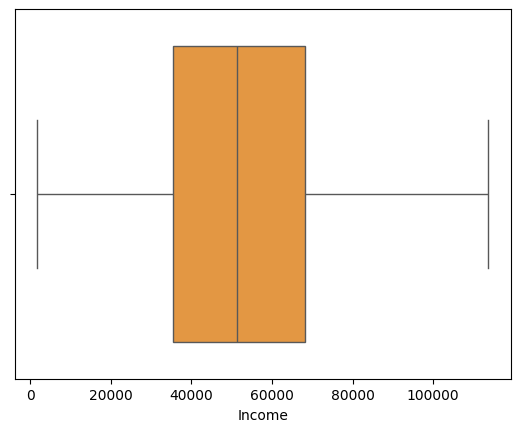

In [310]:
# Melihat distribusi berdasarkan pendapatan
sns.boxplot(x=df['Income'], palette='YlOrBr')

**Insight:**
- Pengaruh Usia dan Pendapatan terhadap Pengeluaran (spending): Pelanggan dengan rentang usia tertentu cenderung mengeluarkan lebih banyak untuk kategori produk tertentu. Pelanggan yang lebih tua dan berpendapatan tinggi lebih mungkin untuk menghabiskan uang pada produk premium seperti anggur dan daging.
- Perbedaan Pengeluaran Berdasarkan Tingkat Pendidikan: Pelanggan dengan pendidikan lebih tinggi mungkin memiliki preferensi untuk produk yang lebih sehat atau organik, yang cenderung lebih mahal. Ini dapat menjadi target untuk kampanye produk sehat atau premium.
- Status Pernikahan dan Pengeluaran Rumah Tangga: Pelanggan yang sudah menikah cenderung berbelanja lebih banyak untuk kebutuhan rumah tangga. Ini dapat dioptimalkan dengan menawarkan paket promosi untuk keluarga atau diskon untuk pembelian dalam jumlah besar.

## **Analisis Pengeluaran Customer**
- Tujuan : Mengetahui pola pengeluaran pelanggan pada berbagai produk untuk mengidentifikasi produk-produk yang paling laris dan potensial untuk peningkatan penjualan.

Wines     623126
Meat      338861
Gold       89518
Fish       76253
Sweet      55785
Fruits     53630
dtype: int64

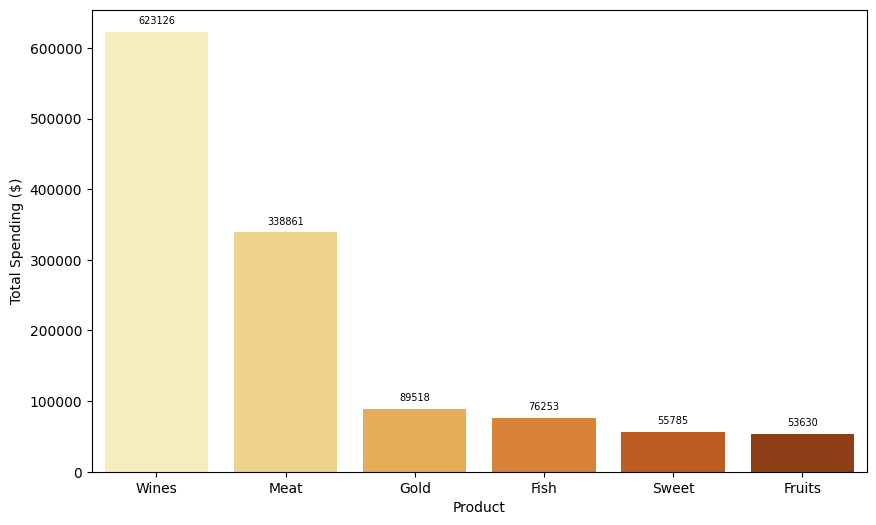

In [311]:
# Menggabungkan jumlah per product
product = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
total_product = df[product].sum().sort_values(ascending=False)
display(total_product)

plt.figure(figsize=(10,6))
plots = sns.barplot(x=total_product.index, y=total_product, palette='YlOrBr')
plt.xlabel('Product', fontsize=10, loc='center')
plt.ylabel('Total Spending ($)', fontsize=10, loc='center')

annotate_bars(plots)
plt.show()

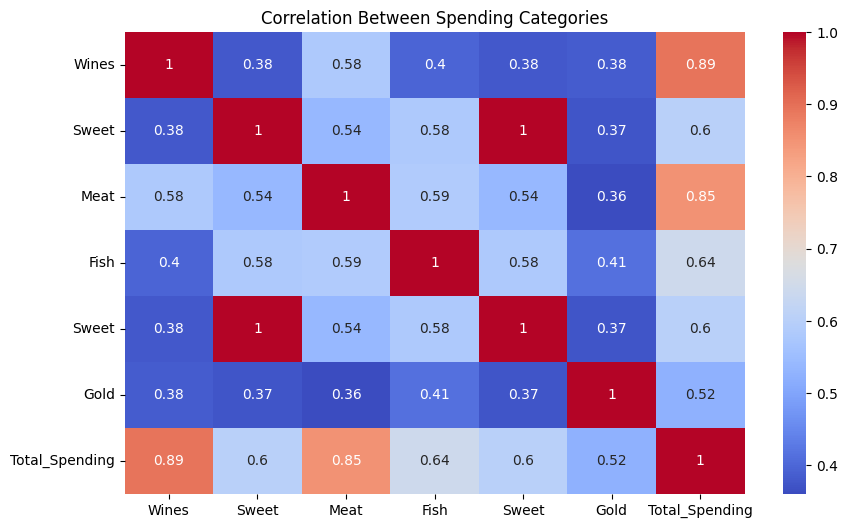

In [312]:
# Melihat Korelasi setiap Product dan Total Spending
plt.figure(figsize=(10,6))
sns.heatmap(df[['Wines', 'Sweet', 'Meat', 'Fish', 'Sweet', 'Gold', 'Total_Spending']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Spending Categories')
plt.show()

**Insight:**
- Identifikasi Produk dengan Keuntungan Tinggi: Kategori produk dengan pengeluaran tinggi seperti anggur (wine) dan daging (meat) dapat difokuskan untuk peningkatan margin keuntungan melalui strategi penetapan harga atau pengurangan biaya.
- Peluang untuk Cross-Selling: Pelanggan yang sering membeli produk tertentu, seperti anggur, mungkin dapat ditarget untuk cross-selling dengan produk lain seperti daging. Menawarkan bundling atau diskon pada pembelian gabungan agar dapat meningkatkan penjualan.
- Strategi Promosi Berdasarkan Tren Pengeluaran: Jika terdapat kategori produk dengan pengeluaran rendah tetapi penting, perusahaan bisa meningkatkan promosi untuk produk tersebut guna meningkatkan volume penjualan dan menarik pelanggan yang sensitif terhadap harga.
- Pengoptimalan Stok: Mengelola stok produk yang berkorelasi tinggi untuk memenuhi permintaan pelanggan yang memiliki pola pengeluaran serupa.

## **Analisis Recency, Frequency, dan Monetary (RFM)**
- Tujuan : Mengelompokkan pelanggan berdasarkan seberapa baru mereka melakukan pembelian (Recency), seberapa sering mereka berbelanja (Frequency), dan seberapa banyak mereka belanja (Monetary).

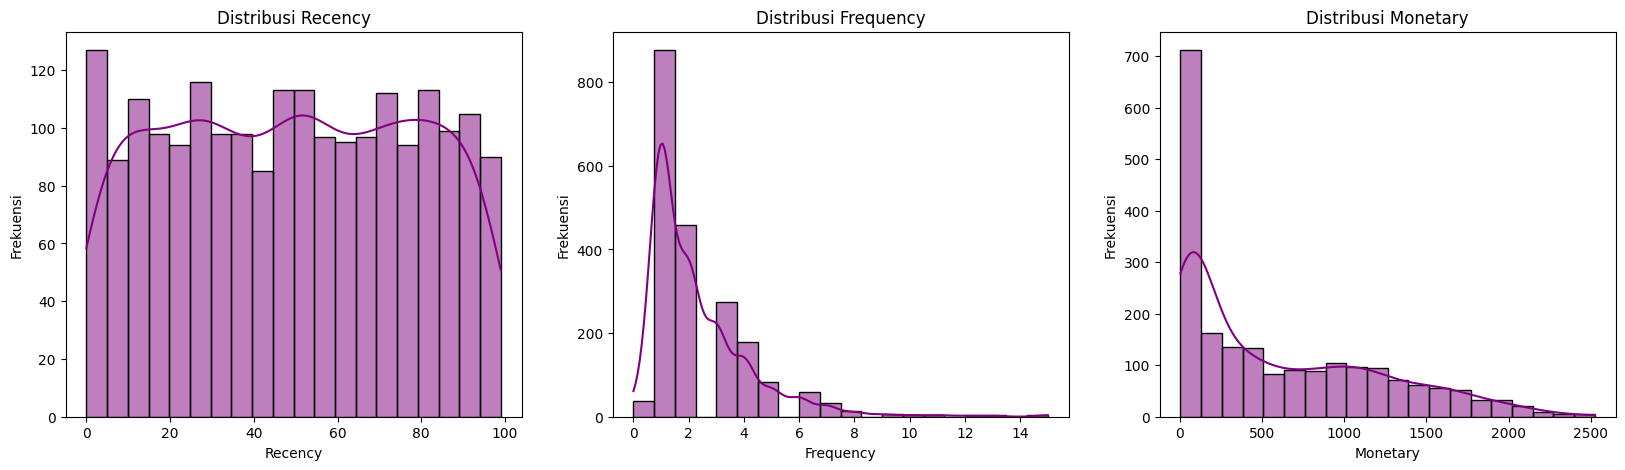

In [313]:
# Daftar kolom yang ingin divisualisasikan
columns_visualize = ['Recency', 'NumDeals', 'Total_Spending']

# Menentukan jumlah kolom untuk subplot
n_cols = 3
n_rows = -(-len(columns_visualize) // n_cols)

# Membuat figure untuk subplot
fig = plt.figure(figsize=(20, 5))

# Looping melalui setiap kolom untuk menampilkan distribusi dan boxplot
for i, column in enumerate(columns_visualize, 1):
    # Subplot untuk distribusi
    fig.add_subplot(n_rows, n_cols, i)
    his = sns.histplot(df[column], bins=20, kde=True, color="purple")
    plt.title(f'Distribusi {['Recency', 'Frequency', 'Monetary'][i-1]}')
    plt.xlabel(['Recency', 'Frequency', 'Monetary'][i-1])
    plt.ylabel('Frekuensi')

# Menampilkan visualisasi
plt.show()

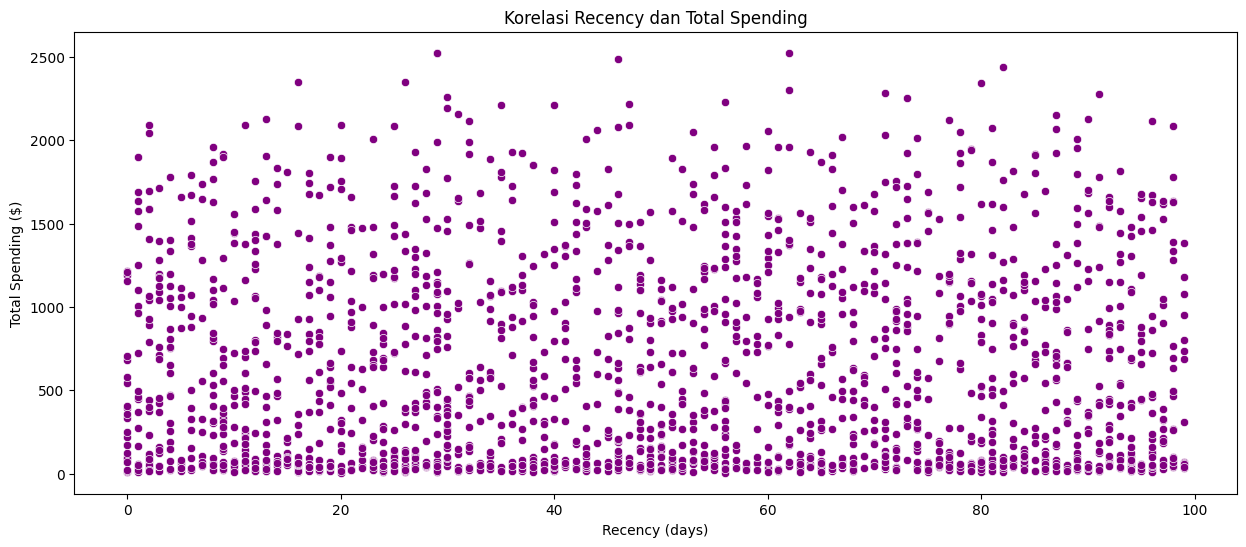

In [314]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Recency', y='Total_Spending', data=df, color='purple')
plt.title('Korelasi Recency dan Total Spending')
plt.xlabel('Recency (days)')
plt.ylabel('Total Spending ($)')
plt.show()

**Insight :**
- Pelanggan dengan Pembelian Terakhir yang Lama (High Recency): Pelanggan ini dapat ditargetkan dengan kampanye re-engagement, seperti pengingat otomatis, diskon, atau penawaran khusus untuk menarik mereka kembali.
- Frekuensi Pembelian yang Tinggi (High Frequency): Pelanggan yang sering berbelanja adalah segmen yang paling berharga. Menawarkan program loyalitas atau diskon eksklusif bisa meningkatkan keterlibatan dan pengeluaran lebih lanjut dari segmen ini.
- Identifikasi Pelanggan dengan Nilai Seumur Hidup Tinggi (High Monetary): Pelanggan yang menghabiskan banyak uang perlu diprioritaskan dalam upaya retensi. Perusahaan dapat menyediakan layanan pelanggan premium atau penawaran eksklusif untuk menjaga mereka tetap setia.

## **Analisis Efektivitas Promosi**
- Tujuan : Mengukur keberhasilan berbagai kampanye promosi untuk menentukan kampanye mana yang paling efektif.

Cmp1        0.065590
Cmp2        0.012726
Cmp3        0.073911
Cmp4        0.077337
Cmp5        0.071464
Response    0.152227
dtype: float64

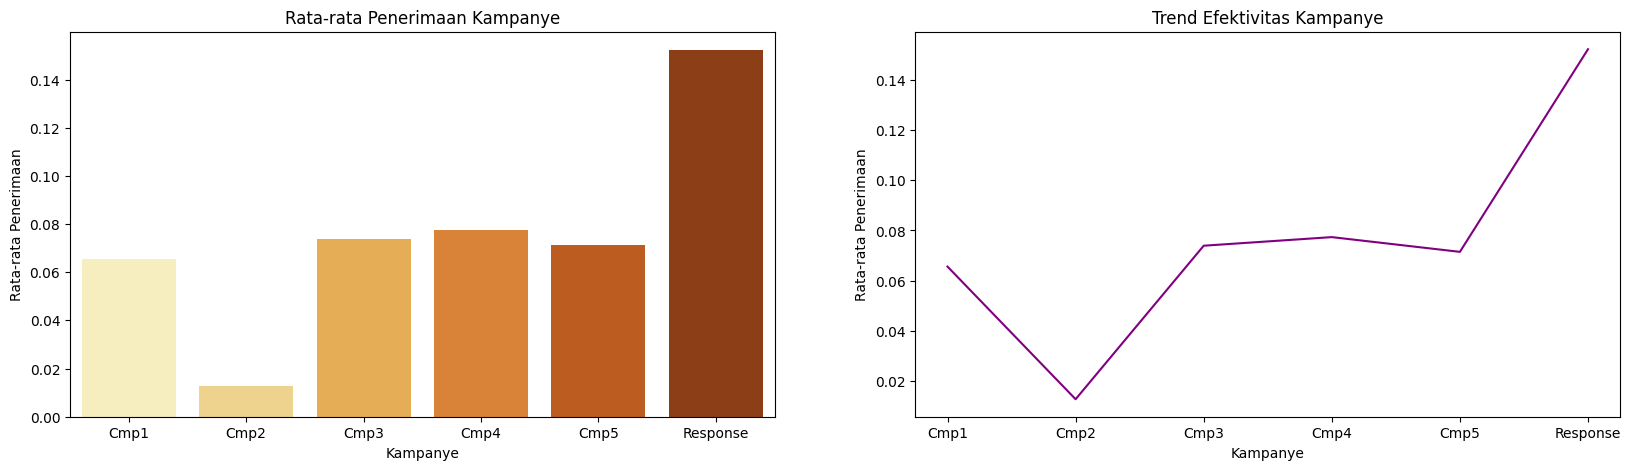

In [315]:
campaigns = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Response']
avg_response = df[campaigns].mean()
display(avg_response)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sns.barplot(x=avg_response.index, y=avg_response.values, palette='YlOrBr')
plt.title('Rata-rata Penerimaan Kampanye')
plt.xlabel('Kampanye')
plt.ylabel('Rata-rata Penerimaan')

plt.subplot(1,2,2)
sns.lineplot(x=campaigns, y=avg_response.values, color='purple')
plt.title('Trend Efektivitas Kampanye')
plt.xlabel('Kampanye')
plt.ylabel('Rata-rata Penerimaan')
plt.show()

**Insight :**
- Efektivitas Kampanye Berdasarkan Respon: Kampanye dengan tingkat respons tertinggi (misalnya, Cmp4) harus dijadikan model untuk kampanye di masa mendatang, sementara kampanye dengan tingkat respons rendah (misalnya, Cmp2) perlu dievaluasi kembali.
- Penyesuaian Kampanye Berdasarkan Segmen Pelanggan: Kampanye yang kurang berhasil dapat dianalisis lebih lanjut untuk memahami apakah penawaran atau waktu kampanye sesuai dengan segmen pelanggan yang ditargetkan.
- Pengoptimalan Anggaran Promosi: Anggaran promosi harus difokuskan pada kampanye yang terbukti efektif. Mengurangi anggaran pada kampanye yang kurang efektif dan mengalokasikan lebih banyak pada yang lebih berhasil dapat meningkatkan Return on Investment (ROI).

## **Analisis Channel Pembelian**
- Tujuan : Mengetahui saluran pembelian mana yang paling banyak digunakan oleh pelanggan (Catalog, Store, Web) untuk meningkatkan strategi penjualan melalui channel yang lebih efektif.

NumStore      11837
NumWeb         8403
NumCatalog     5373
dtype: int64

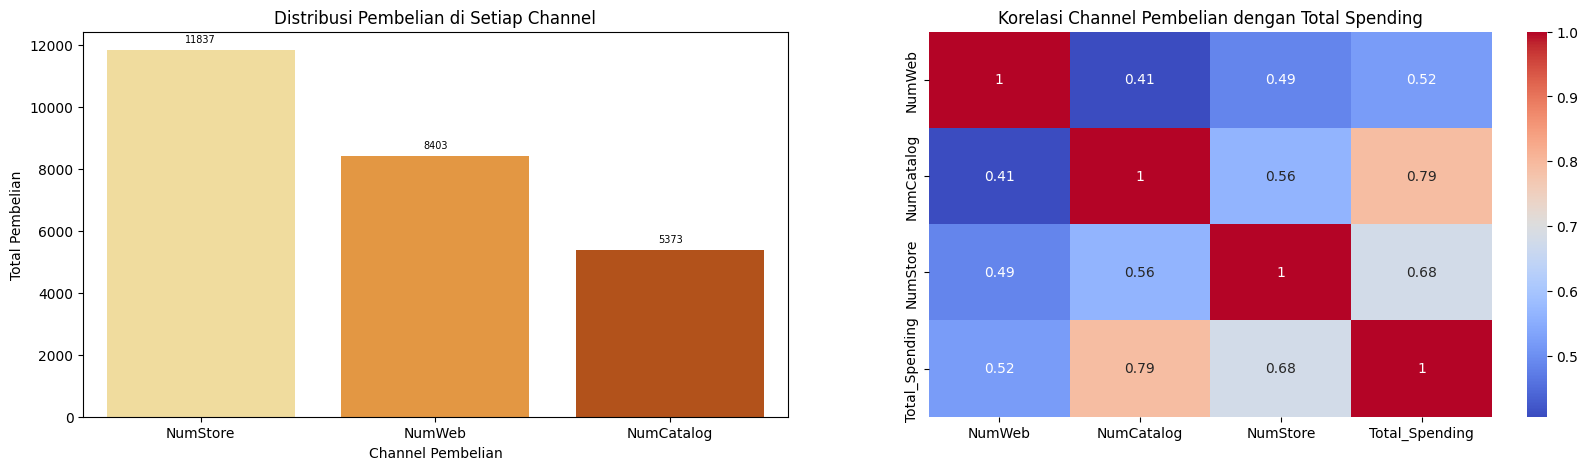

In [316]:
channels = ['NumWeb', 'NumCatalog', 'NumStore']
total_purchases = df[channels].sum().sort_values(ascending=False)
display(total_purchases)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
bar = sns.barplot(x=total_purchases.index, y=total_purchases.values, palette='YlOrBr')
plt.title('Distribusi Pembelian di Setiap Channel')
plt.xlabel('Channel Pembelian')
plt.ylabel('Total Pembelian')
annotate_bars(bar)

plt.subplot(1,2,2)
sns.heatmap(df[channels + ['Total_Spending']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Channel Pembelian dengan Total Spending')

plt.show()

**Insight :**
- Dominasi Channel Web: Jika pembelian melalui web menunjukkan volume yang lebih tinggi, perusahaan dapat memperkuat strategi pemasaran digital dan meningkatkan pengalaman pengguna online untuk memaksimalkan penjualan di saluran ini.
- Kekuatan Toko Offline: Meskipun pembelian online meningkat, toko fisik mungkin masih menjadi saluran penting untuk kategori produk tertentu. Menawarkan pengalaman belanja yang lebih baik di toko fisik atau promosi eksklusif di toko bisa menarik lebih banyak pelanggan.
- Integrasi Saluran untuk Strategi Omnichannel: Perusahaan bisa mengintegrasikan penawaran antara web, katalog, dan toko fisik untuk memberikan pengalaman belanja yang mulus bagi pelanggan. Contohnya, program loyalty yang berlaku di semua saluran atau opsi pengambilan barang di toko untuk pembelian online.

## **Analisis Perilaku Pelanggan Berdasarkan Jumlah Anak (Children)**
- Tujuan : Melihat apakah keluarga dengan lebih banyak anak cenderung menghabiskan lebih banyak atau membeli lebih banyak produk.

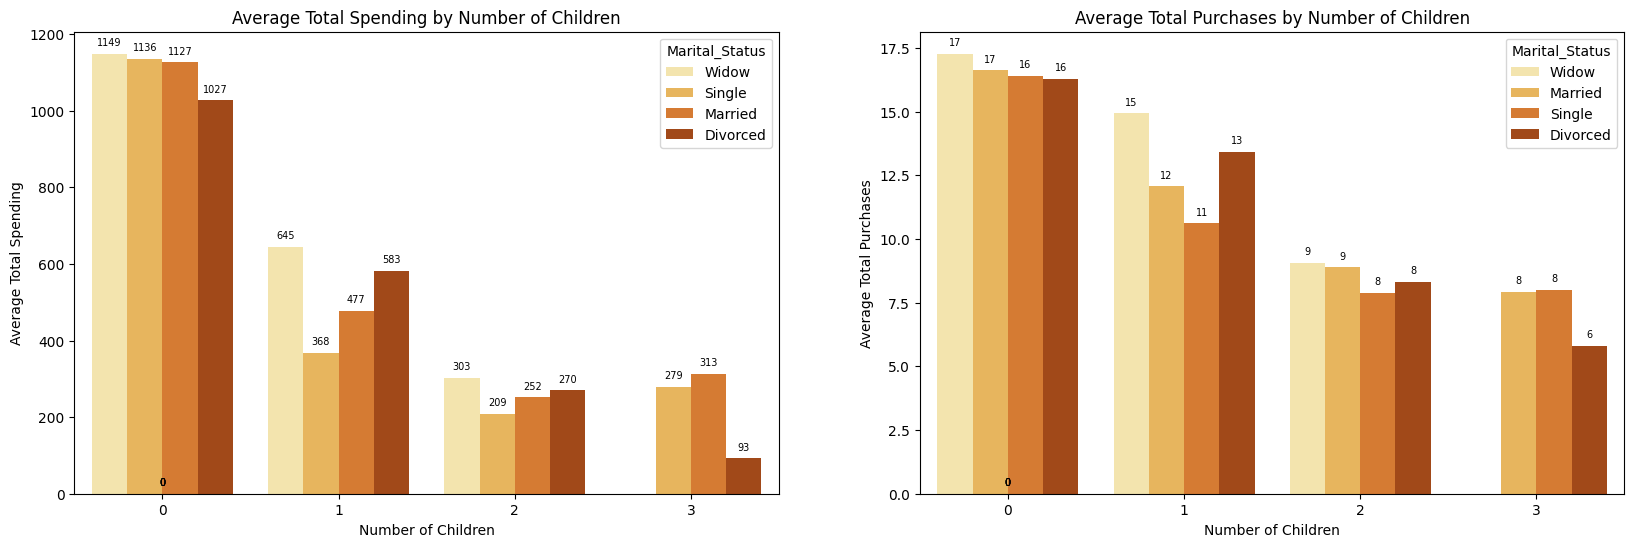

In [317]:
spending_by_children = df.groupby(['Children', 'Marital_Status'])['Total_Spending'].mean().reset_index().sort_values('Total_Spending', ascending=False)
purchases_by_children = df.groupby(['Children', 'Marital_Status'])['Total_Purchases'].mean().reset_index().sort_values('Total_Purchases', ascending=False)

plt.figure(figsize=(20, 6))

# Analisis total pengeluaran berdasarkan jumlah anak
plt.subplot(1,2,1)
plots = sns.barplot(data=spending_by_children, x='Children', y='Total_Spending', hue='Marital_Status', palette='YlOrBr')
plt.title('Average Total Spending by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Total Spending')
annotate_bars(plots)

# Analisis total pembelian berdasarkan jumlah anak
plt.subplot(1,2,2)
bar = sns.barplot(data=purchases_by_children, x='Children', y='Total_Purchases', hue='Marital_Status', palette='YlOrBr')
plt.title('Average Total Purchases by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Total Purchases')
annotate_bars(bar)
plt.show()

**Insight :**
- Prioritas dan Daya Beli Pelanggan Tanpa Anak
    1. Analisis: Pelanggan yang tidak memiliki anak mungkin memiliki lebih banyak disposable income (pendapatan yang dapat digunakan untuk keperluan selain kebutuhan dasar) karena mereka tidak memiliki tanggungan keluarga. Hal ini memungkinkan mereka untuk membelanjakan lebih banyak pada produk non-esensial atau barang-barang premium.
    2. Insight: Pelanggan tanpa anak bisa menjadi target utama untuk produk-produk premium, barang-barang mewah, atau layanan tambahan yang tidak esensial, karena mereka memiliki lebih banyak kebebasan dalam pengeluaran mereka.

- Fokus pada Produk dan Layanan yang Sesuai dengan Gaya Hidup
    1. Analisis: Pelanggan tanpa anak mungkin lebih tertarik pada produk dan layanan yang mendukung gaya hidup pribadi.
    2. Insight: Perusahaan dapat mempertimbangkan untuk mengembangkan atau meningkatkan lini produk yang berfokus pada pengalaman atau barang-barang premium yang sesuai dengan gaya hidup individu tanpa anak.

- Peluang untuk Promosi Khusus dan Penawaran Layanan
    1. Analisis: Karena pelanggan tanpa anak mungkin cenderung membelanjakan lebih banyak pada barang-barang tertentu, ada peluang untuk menciptakan promosi khusus yang menargetkan segmen ini, seperti paket layanan langganan atau penawaran eksklusif.
    2. Insight: Promosi atau program loyalitas yang dirancang khusus untuk pelanggan tanpa anak dapat meningkatkan engagement dan mendorong mereka untuk terus melakukan pembelian, terutama dalam kategori produk di mana mereka cenderung membelanjakan lebih banyak.

## **Analisis Total Spending dan Total Purchases**
- Tujuan : Memahami bagaimana pembelian mempengaruhi pengeluaran. Apakah pelanggan dengan jumlah pembelian yang lebih tinggi juga memiliki total pengeluaran yang lebih tinggi?

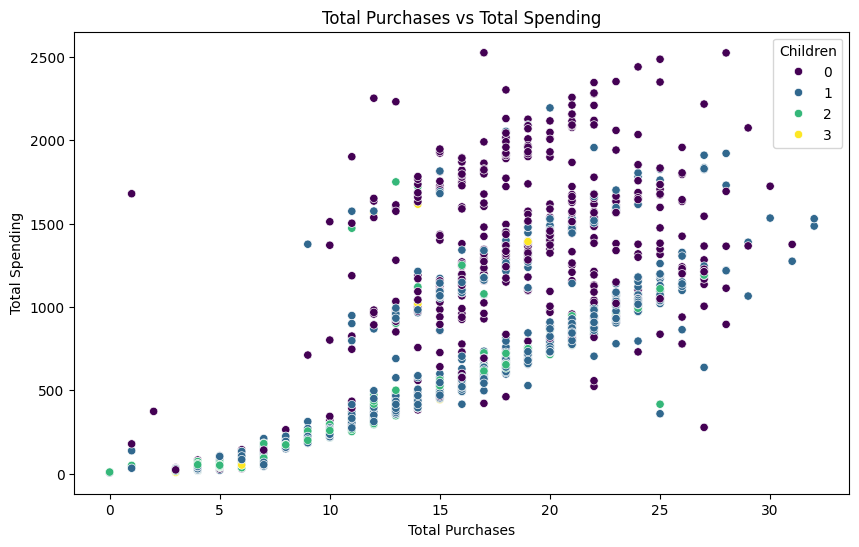

In [318]:
# Analisis hubungan antara Total_Spending dan Total_Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Purchases', y='Total_Spending', hue='Children', palette='viridis')
plt.title('Total Purchases vs Total Spending')
plt.xlabel('Total Purchases')
plt.ylabel('Total Spending')
plt.show()

**Insight :**
- Ada kemungkinan korelasi positif antara jumlah total pembelian dan total pengeluaran, menunjukkan bahwa semakin sering pelanggan berbelanja, semakin besar pengeluaran mereka.
- Pelanggan dengan jumlah pembelian yang tinggi tetapi pengeluaran yang relatif rendah mungkin lebih fokus pada produk dengan harga lebih rendah atau sering memanfaatkan promosi.
- Pelanggan dengan pembelian dan pengeluaran yang tinggi dapat dianggap sebagai pelanggan premium yang penting untuk dijaga dengan program loyalitas khusus.

## **Analisis Kampanye yang Diterima (Campaign Accepted)**
- Tujuan : Memahami seberapa banyak pelanggan yang merespons promosi atau kampanye yang ditawarkan

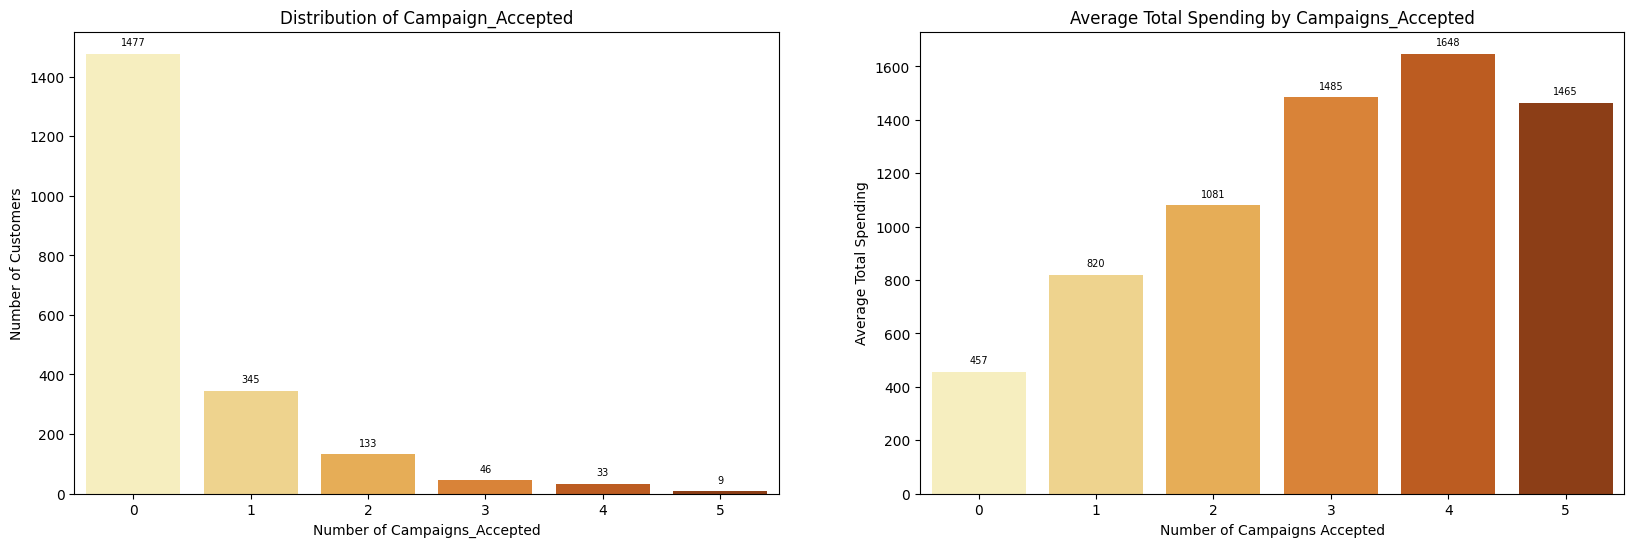

In [319]:
# Distribusi kampanye yang diterima
campaign_accepted_dist = df['Campaign_Accepted'].value_counts().reset_index()
campaign_accepted_dist.columns = ['Campaign_Accepted', 'Count']

# Pengaruh penerimaan kampanye terhadap Total Spending
spending_by_campaign = df.groupby('Campaign_Accepted')['Total_Spending'].mean().reset_index()

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plots = sns.barplot(data=campaign_accepted_dist, x='Campaign_Accepted', y='Count', palette='YlOrBr')
plt.title('Distribution of Campaign_Accepted')
plt.xlabel('Number of Campaigns_Accepted')
plt.ylabel('Number of Customers')
annotate_bars(plots)

plt.subplot(1,2,2)
plots = sns.barplot(data=spending_by_campaign, x='Campaign_Accepted', y='Total_Spending', palette='YlOrBr')
plt.title('Average Total Spending by Campaigns_Accepted')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Average Total Spending')
annotate_bars(plots)
plt.show()

**Insight :**
- Ketidakefektifan Kampanye untuk Sebagian Besar Pelanggan
    1. Analisis: Distribusi menunjukkan bahwa sebagian besar pelanggan tidak menerima kampanye yang ditawarkan, yang mengindikasikan bahwa kampanye yang ada mungkin kurang menarik atau tidak relevan bagi sebagian besar pelanggan.
    2. Insight: Perusahaan perlu mengevaluasi kembali strategi kampanye pemasaran untuk memahami mengapa banyak pelanggan tidak merespons. Ini mungkin memerlukan pendekatan yang lebih personal atau segmen yang lebih spesifik untuk meningkatkan tingkat penerimaan.

- Kampanye Nomor 4 Memiliki Dampak yang Signifikan
    1. Analisis: Meskipun sebagian besar pelanggan tidak menerima kampanye, kampanye nomor 4 berhasil meningkatkan rata-rata pengeluaran di antara mereka yang menerima. Ini menunjukkan bahwa kampanye ini lebih efektif dalam mendorong pengeluaran yang lebih tinggi.
    2. Insight: Kampanye nomor 4 memiliki elemen yang efektif dalam mendorong pengeluaran, sehingga perlu dianalisis lebih lanjut untuk memahami komponen apa yang membuatnya berhasil. Elemen-elemen ini dapat diterapkan atau disesuaikan pada kampanye lain untuk meningkatkan efektivitas.

- Potensi untuk Mengoptimalkan Kampanye Lain
    1. Analisis: Jika kampanye nomor 4 berhasil meningkatkan rata-rata pengeluaran, maka ada potensi untuk mengoptimalkan kampanye lainnya dengan menyesuaikan strategi atau menawarkan insentif yang serupa dengan kampanye nomor 4.
    2. Insight: Perusahaan dapat melakukan A/B testing atau eksperimen pemasaran untuk melihat apakah strategi dari kampanye nomor 4 bisa diterapkan ke kampanye lain, atau jika ada cara untuk menggabungkan elemen-elemen sukses dari kampanye nomor 4 ke dalam kampanye baru.

## **Conclusion**

1. Identifikasi Pelanggan yang Menghasilkan Keuntungan Tinggi:
    - Berdasarkan analisis, saya menemukan bahwa kelompok pelanggan tertentu (misalnya, pelanggan dengan tingkat pendidikan tinggi atau status pernikahan tertentu) cenderung menghabiskan lebih banyak pada produk tertentu. Kesimpulan ini menunjukkan siapa target pasar utama yang mendukung profit perusahaan.

2.	Efektivitas Kampanye Promosi:
    - Jika kampanye promosi tertentu menunjukkan tingkat penerimaan yang tinggi di antara pelanggan yang menghasilkan keuntungan besar, saya mengambil kesimpulan bahwa kampanye tersebut efektif dalam meningkatkan profit perusahaan. Sebaliknya, kampanye dengan tingkat penerimaan rendah mungkin perlu dievaluasi ulang atau dihentikan.

3.	Channel Pembelian yang Dominan:
    - Dari analisis, mungkin terungkap bahwa sebagian besar pembelian dilakukan melalui saluran tertentu, seperti pembelian langsung di toko atau melalui website. Ini menunjukkan saluran mana yang paling efektif dalam menghasilkan penjualan dan harus diprioritaskan.

4. Pengeluaran Pelanggan di Kategori Produk:
    - Saya menyimpulkan bahwa pelanggan cenderung lebih banyak menghabiskan uang pada kategori produk tertentu (seperti anggur atau daging), yang menunjukkan bahwa produk tersebut adalah pendorong utama profit. Fokus dapat diberikan pada penguatan penawaran untuk kategori-kategori ini.

## **Recommendation**

1. Optimalisasi Targeting pada Pelanggan Bernilai Tinggi:
    - Rekomendasikan untuk memfokuskan upaya pemasaran dan promosi pada kelompok pelanggan yang telah diidentifikasi sebagai kontributor utama profit, misalnya melalui kampanye yang dipersonalisasi berdasarkan profil demografi atau perilaku pembelian mereka.

2.	Evaluasi dan Penyesuaian Kampanye Promosi:
    - Sarankan untuk mengevaluasi efektivitas kampanye promosi berdasarkan data. Kampanye yang kurang efektif mungkin perlu dihentikan atau diganti, sementara kampanye yang sukses bisa diperluas atau dioptimalkan lebih lanjut.

3.	Penguatan Channel Pembelian Utama:
    - Rekomendasikan untuk meningkatkan investasi dan dukungan pada saluran pembelian yang paling banyak digunakan oleh pelanggan, seperti meningkatkan pengalaman berbelanja online jika mayoritas pembelian dilakukan melalui website.

4.	Pengembangan dan Penawaran Produk Unggulan:
    - Sarankan untuk memperkuat penawaran pada kategori produk yang mendatangkan pengeluaran terbesar dari pelanggan. Ini bisa mencakup promosi khusus, bundling produk, atau pengembangan produk baru dalam kategori tersebut.